# Embedding + Inter-Utterance Coherence

In [ ]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from tensorflow.saved_model import load
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
from sentence_transformers import SentenceTransformer

## Load Files

In [ ]:
#Choose for weights 
folder_path = '/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Cleaned Transcripts/Weights/Clean'
# folder = '/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Cleaned Transcripts/Weights/USE_SBERT_InterUtteranceCoherence'


In [ ]:

#Choose for Makecode
folder_path = '/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Cleaned Transcripts/Makecode/Clean'
# folder = '/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Cleaned Transcripts/Makecode/USE_SBERT_InterUtteranceCoherence'


## Load USE + SBERT Models and Functions

In [ ]:
#had trouble loading USE model, so downloaded locally 
model_dir = '/Users/emilydoherty/Desktop/ModelFiles'
use_embed = load(model_dir)

# Function to calculate USE embeddings for a given text
def embed_text_USE(text):
    embedding = use_embed([text])
    return embedding[0]

#SBERT MODEL
sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to calculate SBERT embeddings for a given text
def embed_text_sbert(text):
    embedding = sbert_model.encode([text])
    return embedding[0]

## Inter-Utterance Coherence

In [ ]:
file_names = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_excel(file_path)
    # df = df.dropna()
    df['Text'] = df['Text'].astype(str)

    # Apply USE embeddings to the 'Text' column
    df['Text_Embedding_USE'] = df['Text'].apply(embed_text_USE)

    # Calculate cosine similarity between consecutive pairs of rows using USE embeddings
    num_embeddings = len(df['Text_Embedding_USE'])
    cosine_similarities = []

    for i in range(num_embeddings - 1):
        # Compare embedding i with embedding i+1
        j = i + 1 
        # Calculate cosine similarity between embeddings i and j
        similarity = cosine_similarity([df['Text_Embedding_USE'][i]], [df['Text_Embedding_USE'][j]])[0][0]ssh -T git@github.com
        cosine_similarities.append(similarity)

    # Add the cosine similarities to the DataFrame
    df['Cosine_Similarity_USE'] = [None] + cosine_similarities

    # Apply SBERT embeddings to the 'Text' column
    df['Text_Embedding_SBERT'] = df['Text'].apply(embed_text_sbert)

    # Calculate cosine similarity between consecutive pairs of rows using SBERT embeddings
    num_embeddings = len(df['Text_Embedding_SBERT'])
    cosine_similarities = []

    for i in range(num_embeddings - 1):
        # Compare embedding i with embedding i+1
        j = i + 1 
        # Calculate cosine similarity between embeddings i and j
        similarity = cosine_similarity([df['Text_Embedding_SBERT'][i]], [df['Text_Embedding_SBERT'][j]])[0][0]
        cosine_similarities.append(similarity)

    # Add the cosine similarities to the DataFrame
    df['Cosine_Similarity_SBERT'] = [None] + cosine_similarities
    
    #Remove embedding columns for memory
    columns_to_drop = ['Text_Embedding_USE', 'Text_Embedding_SBERT']
    df.drop(columns=columns_to_drop, inplace=True)

    #save files 
    output_file_path = os.path.join(folder, f'coherence_{file_name}')
    df.to_excel(output_file_path, index=False)


In [63]:
#Choose for Weights 
folder_path = '/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Cleaned Transcripts/Weights/USE_SBERT_InterUtteranceCoherence'

file_names = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]
result_list = []
overall_mean_sbert =[]
overall_mean_use=[]

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_excel(file_path)
    
    sbertmean=(df['Cosine_Similarity_SBERT']).mean()
    usemean=(df['Cosine_Similarity_USE']).mean()

    # Append mean similarity to the list
    overall_mean_use.append(usemean)
    overall_mean_sbert.append(sbertmean)
    
    # result_list.append({'session_ID': file_name.split('_')[2], 'overall_mean_use': overall_mean_use, 'overall_mean_sbert': overall_mean_sbert})

    result_list.append({'Session_ID':file_name.split('_')[2]})
result_df = pd.DataFrame(result_list)
result_df.loc[:,'Cosine_Similarity_SBERT']=overall_mean_sbert
result_df.loc[:,'Cosine_Similarity_USE']=overall_mean_use
result_df['Session_ID'] = result_df['Session_ID'].astype('int64')
result_df = result_df.sort_values(by='Session_ID')
print(result_df)

    #  # Print the file name and mean values
    # print(f"File: {file_name}")
    # print(f"SBERT Mean: {sbertmean}")
    # print(f"USE Mean: {usemean}")
    # print("\n")

    # plt.plot(df['Cosine_Similarity_SBERT'], label='SBERT')
    # plt.plot(df['Cosine_Similarity_USE'], label = 'USE')
    # plt.legend()
    # plt.show


    Session_ID  Cosine_Similarity_SBERT  Cosine_Similarity_USE
4          311                 0.273156               0.203265
3          312                 0.315082               0.233690
29         313                 0.305833               0.230612
15         315                 0.275838               0.194762
24         316                 0.293720               0.189372
7          321                 0.276016               0.200883
22         326                 0.360061               0.275944
10         327                 0.284088               0.208615
19         328                 0.280870               0.167714
13         329                 0.267194               0.182550
26         330                 0.267142               0.132246
1          332                 0.258938               0.195599
27         333                 0.326876               0.210021
17         335                 0.267341               0.140845
23         336                 0.305571               0

# Add to datasheets

In [64]:
#add to datasheets 
round = pd.read_excel('/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Other Measures/means_perSessionIDRound.xlsx')

merged_df = pd.merge(round, result_df, on='Session_ID', how='left')

# Update values in session only where Round is equal to 4 (#Change round number depending on makecode or weights)
round.loc[round['Round'] == 2, ['Cosine_Similarity_SBERT', 'Cosine_Similarity_USE']] = \
    merged_df.loc[merged_df['Round'] == 2, ['Cosine_Similarity_SBERT', 'Cosine_Similarity_USE']].values


In [65]:
#Choose for Makecode 
folder_path = '/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Cleaned Transcripts/Makecode/USE_SBERT_InterUtteranceCoherence'
file_names = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]
result_list = []
overall_mean_sbert =[]
overall_mean_use=[]

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_excel(file_path)
    
    sbertmean=(df['Cosine_Similarity_SBERT']).mean()
    usemean=(df['Cosine_Similarity_USE']).mean()

    # Append mean similarity to the list
    overall_mean_use.append(usemean)
    overall_mean_sbert.append(sbertmean)
    
    # result_list.append({'session_ID': file_name.split('_')[2], 'overall_mean_use': overall_mean_use, 'overall_mean_sbert': overall_mean_sbert})

    result_list.append({'Session_ID':file_name.split('_')[2]})

result_df = pd.DataFrame(result_list)
result_df.loc[:,'Cosine_Similarity_SBERT']=overall_mean_sbert
result_df.loc[:,'Cosine_Similarity_USE']=overall_mean_use
result_df['Session_ID'] = result_df['Session_ID'].astype('int64')
result_df = result_df.sort_values(by='Session_ID')
print(result_df)

mask = round['Round'] == 4
round.loc[mask, ['Cosine_Similarity_SBERT', 'Cosine_Similarity_USE']] = \
    result_df.loc[result_df['Session_ID'].isin(round.loc[mask, 'Session_ID']),
                  ['Cosine_Similarity_SBERT', 'Cosine_Similarity_USE']].values



    Session_ID  Cosine_Similarity_SBERT  Cosine_Similarity_USE
22         311                 0.212686               0.166725
19         312                 0.240890               0.167014
17         313                 0.252645               0.190648
28         315                 0.246415               0.205217
25         316                 0.194901               0.133987
4          321                 0.254854               0.195231
1          326                 0.271749               0.204459
0          327                 0.265798               0.210477
12         328                 0.224267               0.169104
11         329                 0.269934               0.194939
10         330                 0.270378               0.163144
8          332                 0.250781               0.175348
9          333                 0.244964               0.173302
7          335                 0.196672               0.159864
6          336                 0.203194               0

<function matplotlib.pyplot.show(close=None, block=None)>

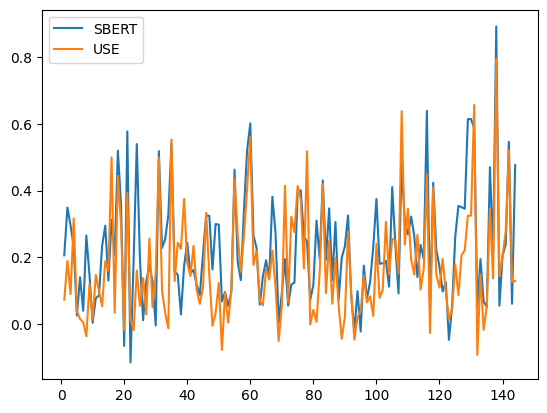

In [66]:
plt.plot(df['Cosine_Similarity_SBERT'], label='SBERT')
plt.plot(df['Cosine_Similarity_USE'], label = 'USE')
plt.legend()
plt.show

In [67]:
#save round variable
round.to_pickle('round.pkl')
# round = pd.read_pickle('round.pkl')

## Interutterance coherence [sliding windows of 3]

In [68]:
#Choose for weights 
folder_path = '/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Cleaned Transcripts/Weights/Clean'

In [74]:
#Choose for Makecode
folder_path = '/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Cleaned Transcripts/Makecode/Clean'

In [75]:
file_names = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]
result_list = []

# Embed 
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_excel(file_path)
    # df = df.dropna()
    df['Text'] = df['Text'].astype(str)

    df['Text_Embedding_USE'] = df['Text'].apply(embed_text_USE)

    use_embeddings = df['Text_Embedding_USE']

    df['Text_Embedding_SBERT'] = df['Text'].apply(embed_text_sbert)

    sbert_embeddings = df['Text_Embedding_SBERT']

# Define sliding window size
    window_size = 3 
    mean_similarities_use = []
    mean_similarities_sbert = []
    
    for i in range(len(use_embeddings) - window_size + 1):
        # Extract numerical values from USE tensors
        window_use = np.vstack([emb.numpy() for emb in use_embeddings[i:i+window_size]])
        
        # Extract numerical values from SBERT arrays
        window_sbert = np.vstack(sbert_embeddings[i:i+window_size])

        # Calculate cosine similarity for USE embeddings
        cos_sim_use = cosine_similarity(window_use)
        mean_sim_use = np.mean(cos_sim_use)

        # Calculate cosine similarity for SBERT embeddings
        cos_sim_sbert = cosine_similarity(window_sbert)
        mean_sim_sbert = np.mean(cos_sim_sbert)

        # Append mean similarity to the list
        mean_similarities_use.append(mean_sim_use)
        mean_similarities_sbert.append(mean_sim_sbert)

        # Calculate overall mean for each embedding method
    overall_mean_use = np.mean(mean_similarities_use)
    overall_mean_sbert = np.mean(mean_similarities_sbert)

    result_list.append({'Session_ID': file_name.split('_')[1], '3windowavg_use': overall_mean_use, '3windowavg_sbert': overall_mean_sbert})

result_df = pd.DataFrame(result_list)
# result_df.loc[:,'Cosine_Similarity_SBERT']=overall_mean_sbert
# result_df.loc[:,'Cosine_Similarity_USE']=overall_mean_use
result_df['Session_ID'] = result_df['Session_ID'].astype('int64')
result_df = result_df.sort_values(by='Session_ID')
print(result_df)


    Session_ID  3windowavg_use  3windowavg_sbert
7          311        0.444272          0.478629
11         312        0.449810          0.493956
9          313        0.457525          0.499484
1          315        0.465626          0.494457
4          316        0.432195          0.472066
27         321        0.467416          0.503713
29         326        0.465829          0.510305
28         327        0.468336          0.505938
19         328        0.455154          0.494408
18         329        0.461885          0.510937
17         330        0.442410          0.508352
20         332        0.446411          0.496083
21         333        0.449980          0.495390
22         335        0.444509          0.463262
24         336        0.439927          0.493619
23         337        0.446380          0.478784
26         338        0.436466          0.475172
25         339        0.465849          0.488030
6          340        0.450835          0.492831
8          341      

## Add to datasheets by Session_Id

In [73]:
#use for weights
merged_df = pd.merge(round, result_df, on='Session_ID', how='left')

# Update values in session only where Round is equal to 2 
round.loc[round['Round'] == 2, ['3windowavg_use', '3windowavg_sbert']] = \
    merged_df.loc[merged_df['Round'] == 2, ['3windowavg_use', '3windowavg_sbert']].values

In [76]:
#use for makecode
mask = round['Round'] == 4
round.loc[mask, ['3windowavg_use', '3windowavg_sbert']] = \
    result_df.loc[result_df['Session_ID'].isin(round.loc[mask, 'Session_ID']),
                  ['3windowavg_use', '3windowavg_sbert']].values

In [77]:
#resave round variable 
round.to_pickle('round.pkl')
round.to_excel('/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Other Measures/means_perSessionIDRound.xlsx')

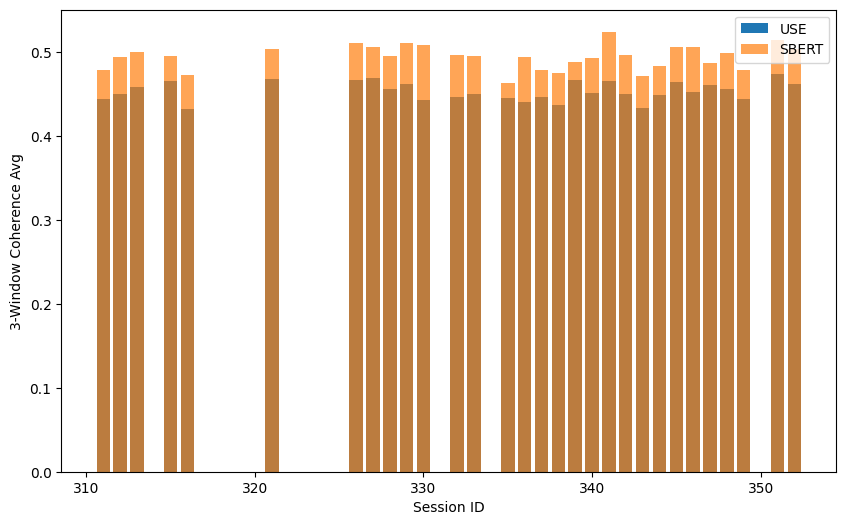

In [79]:
plt.figure(figsize=(10, 6))
plt.bar(result_df['Session_ID'], result_df['3windowavg_use'], label='USE')
plt.bar(result_df['Session_ID'], result_df['3windowavg_sbert'], label='SBERT', alpha=0.7)
plt.xlabel('Session ID')
plt.ylabel('3-Window Coherence Avg')
# plt.title('Overall Mean Cosine Similarity Comparison')
plt.legend()
plt.show()

In [80]:
use = result_df['3windowavg_use']
sbert=result_df['3windowavg_sbert']

data=np.array([use,sbert])
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(data)

# The correlation coefficient is at position (0, 1) or (1, 0) in the matrix
correlation_coefficient = correlation_matrix[0, 1]

# Print the result
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.7105494822319894


# Compute inter-teammate coherence  

In [99]:
data = {'Session_ID': [343, 311, 311, 311, 312, 312, 312, 313, 313, 315, 315, 315, 316, 316, 321, 321, 326, 326, 326, 327, 327, 327, 328, 328, 329, 329, 330, 330, 330, 332, 332, 332, 333, 333, 333, 335, 335, 336, 336, 337, 337, 338, 338, 339, 339, 340, 340, 340, 341, 341, 341, 342, 342, 342, 343, 344, 344, 344, 345, 345, 345, 346, 346, 346, 347, 347, 348, 348, 349, 349, 351, 351, 352, 352, 352],
        'Speaker': [150, 202, 203, 204, 205, 206, 207, 208, 209, 214, 215, 216, 217, 218, 232, 233, 247, 248, 249, 250, 251, 252, 253, 254, 256, 257, 258, 259, 260, 264, 265, 266, 267, 268, 270, 273, 274, 276, 277, 279, 280, 281, 282, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 317]}
data = pd.DataFrame(data)
print(data)
speakers=data['Speaker']
##import transcripts 
#Choose for Weights
folder_path = '/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Cleaned Transcripts/Weights/Clean'
#Choose for Makecode
folder_path = '/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Cleaned Transcripts/Makecode/Clean'


    Session_ID  Speaker
0          343      150
1          311      202
2          311      203
3          311      204
4          312      205
..         ...      ...
70         351      313
71         351      314
72         352      315
73         352      316
74         352      317

[75 rows x 2 columns]


In [104]:
import os
import pandas as pd

folder_path = '/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Cleaned Transcripts/Makecode/Clean'
file_names = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]

# Initialize an empty list to store DataFrames for each file
dfs = []

# Iterate through each file and read it into a DataFrame
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_excel(file_path)  # Assuming Excel files
    df['Text']=df['Text'].astype(str)
    dfs.append(df)

# Concatenate all DataFrames into one
merged_df = pd.concat(dfs, ignore_index=True)

# Group by Participant_ID and concatenate all utterances for each participant
grouped_df = merged_df.groupby('Speaker')['Text'].apply(lambda x: ' '.join(x)).reset_index()

#add sessionIDs to grouped_df
df2 = pd.merge(grouped_df, data[['Speaker', 'Session_ID']], on='Speaker', how='left')

# # Embed
df2['Text_Embedding_SBERT'] = grouped_df['Text'].apply(embed_text_sbert)
df2['Text_Embedding_USE'] = grouped_df['Text'].apply(embed_text_USE)
print(df2)


    Speaker                                               Text  Session_ID  \
0       150  I don't know really what to do. Oh when button...         343   
1       202  I think it says   Is it this little thing Ok I...         311   
2       203  Where is the tutorial First we'll need wire yo...         311   
3       204  Click Next Show sound tutorial Ok Ok we can fi...         311   
4       205  nan What is that? Yeah I did hear that It's ju...         312   
..      ...                                                ...         ...   
70      313  wire the gator microphone to the gator bit I g...         351   
71      314  i think is it already wired right? yea um what...         351   
72      315  use the microbit and gator microphone how loud...         352   
73      316  yea yea what number? I was not looking at that...         352   
74      317  okay I think that's like already done? oh is i...         352   

                                 Text_Embedding_SBERT  \
0   [-

In [122]:
import os
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming 'df2' contains 'Session_ID', 'Speaker', 'Text_Embedding_SBERT', and 'Text_Embedding_USE' columns

# Initialize an empty list to store coherence results
coherence_results = []

# Iterate through each session and compute cosine similarity between speakers
for session_id, session_data in df2.groupby('Session_ID'):
    speakers = session_data['Speaker'].unique()
    
    # Extract embeddings for each speaker
    speaker_embeddings = session_data[['Speaker', 'Text_Embedding_SBERT', 'Text_Embedding_USE']]
    
    # Create a dictionary to store embeddings for each speaker
    embeddings_dict = {speaker: {'SBERT': None, 'USE': None} for speaker in speakers}
    
    # Populate the embeddings dictionary
    for _, row in speaker_embeddings.iterrows():
        try:
            sbert_embedding = np.frombuffer(row['Text_Embedding_SBERT'], dtype='float32')
            use_embedding = np.frombuffer(row['Text_Embedding_USE'], dtype='float32')
            
            # Check if embeddings are not empty
            if sbert_embedding.size > 0:
                embeddings_dict[row['Speaker']]['SBERT'] = sbert_embedding
            
            if use_embedding.size > 0:
                embeddings_dict[row['Speaker']]['USE'] = use_embedding
        except ValueError:
            print(f"Error reading embeddings for Session_ID {session_id}, Speaker {row['Speaker']}")
    
    # Calculate cosine similarity between all pairs of speakers
    for i in range(len(speakers)):
        for j in range(i+1, len(speakers)):
            speaker_1, speaker_2 = speakers[i], speakers[j]
            
            sbert_embedding_1 = embeddings_dict[speaker_1]['SBERT']
            sbert_embedding_2 = embeddings_dict[speaker_2]['SBERT']
            use_embedding_1 = embeddings_dict[speaker_1]['USE']
            use_embedding_2 = embeddings_dict[speaker_2]['USE']
            
            # Check if embeddings are not empty before computing similarity
            if sbert_embedding_1 is not None and sbert_embedding_2 is not None:
                sbert_similarity = cosine_similarity([sbert_embedding_1], [sbert_embedding_2])[0, 0]
            else:
                sbert_similarity = np.nan
            
            if use_embedding_1 is not None and use_embedding_2 is not None:
                use_similarity = cosine_similarity([use_embedding_1], [use_embedding_2])[0, 0]
            else:
                use_similarity = np.nan
            
            coherence_results.append({
                'Session_ID': session_id,
                'Speaker_1': speaker_1,
                'Speaker_2': speaker_2,
                'SBERT_Coherence': sbert_similarity,
                'USE_Coherence': use_similarity
            })

# Create a DataFrame with coherence results
coherence_df = pd.DataFrame(coherence_results)

# Display the coherence results
print(coherence_df)
coherence_df.to_excel('inter_speaker_coherence.xlsx')


    Session_ID  Speaker_1  Speaker_2  SBERT_Coherence  USE_Coherence
0          311        202        203         0.342057       0.816275
1          311        202        204         0.519635       0.755604
2          311        203        204         0.413260       0.852434
3          312        205        206         0.501812       0.688407
4          312        205        207         0.685025       0.817922
5          312        206        207         0.517359       0.774812
6          313        208        209         0.354910       0.614883
7          315        214        215         0.752374       0.811282
8          315        214        216         0.561269       0.601095
9          315        215        216         0.485587       0.700922
10         316        217        218         0.655624       0.691584
11         321        232        233         0.665683       0.710437
12         326        247        248         0.530231       0.777936
13         326        247        2

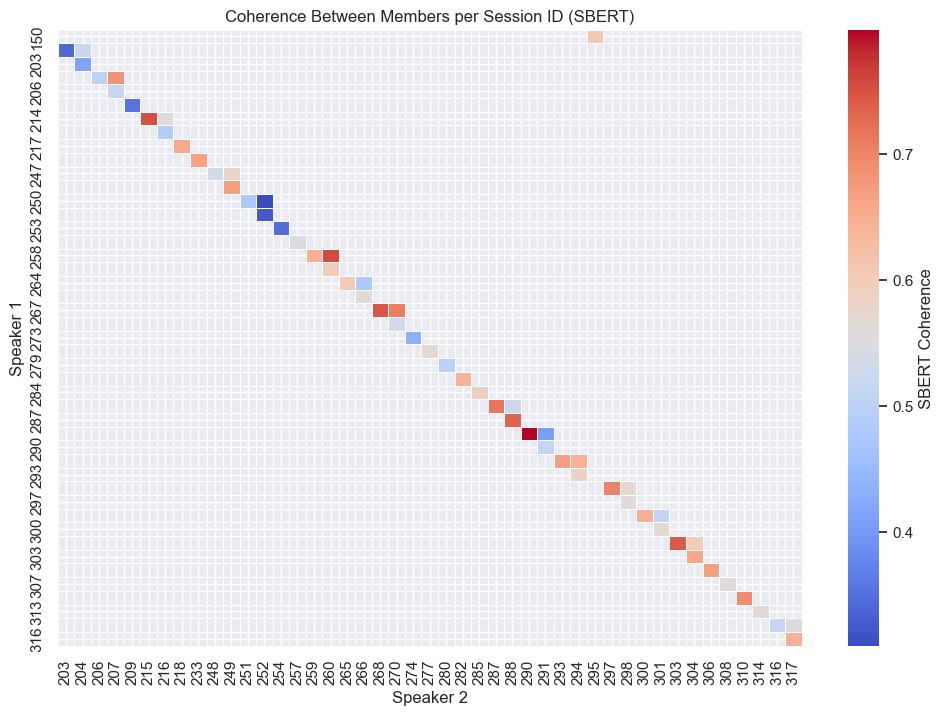

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'coherence_df' contains the coherence results

# Pivot the DataFrame for easier plotting
coherence_pivot = coherence_df.pivot(index='Speaker_1', columns='Speaker_2', values='SBERT_Coherence')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Customize the heatmap using seaborn
sns.set(font_scale=1)
sns.heatmap(
    coherence_pivot,
    annot=False,
    fmt=".2f",  # Format for displaying coherence values
    cmap='coolwarm',
    linewidths=.5,
    cbar_kws={'label': 'SBERT Coherence'},
)

# Add labels and title
plt.title('Coherence Between Members per Session ID (SBERT)')
plt.xlabel('Speaker 2')
plt.ylabel('Speaker 1')

# Show the plot
plt.show()


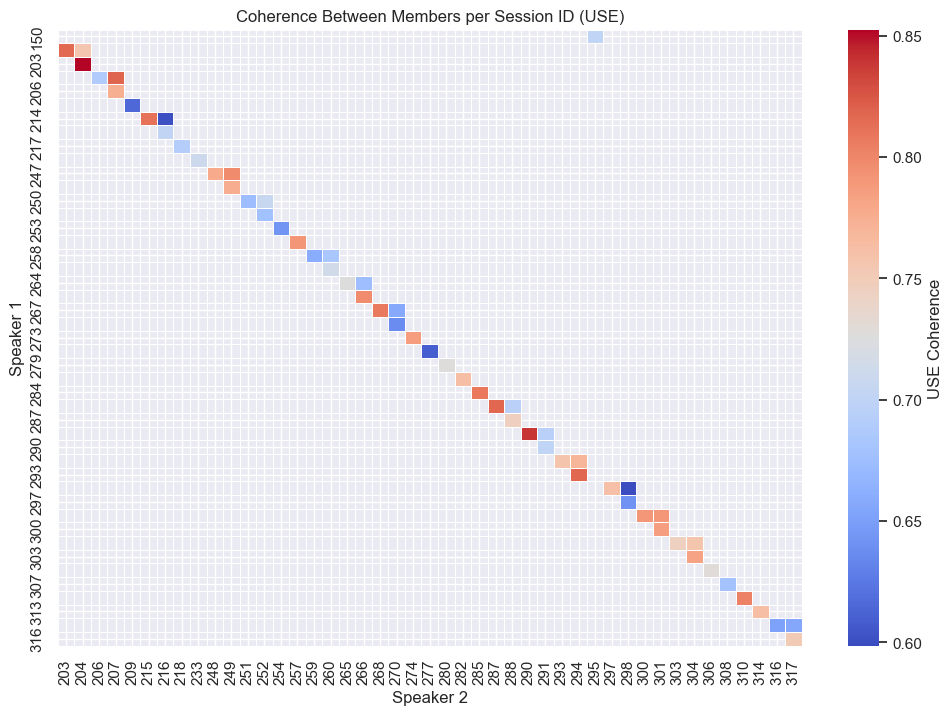

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'coherence_df' contains the coherence results with 'USE_Coherence'

# Pivot the DataFrame for 'USE_Coherence'
coherence_pivot_use = coherence_df.pivot(index='Speaker_1', columns='Speaker_2', values='USE_Coherence')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Customize the heatmap using seaborn for USE
sns.set(font_scale=1)
sns.heatmap(
    coherence_pivot_use,
    annot=False,  # Do not display annotations
    cmap='coolwarm',
    linewidths=.5,
    cbar_kws={'label': 'USE Coherence'},
)

# Add labels and title for USE
plt.title('Coherence Between Members per Session ID (USE)')
plt.xlabel('Speaker 2')
plt.ylabel('Speaker 1')

# Show the plot for USE
plt.show()


In [119]:
# Calculate correlation
correlation = coherence_df['USE_Coherence'].corr(coherence_df['SBERT_Coherence'])

# Display the correlation
print(f'Correlation between USE and SBERT Coherence: {correlation}')

Correlation between USE and SBERT Coherence: 0.29572398394115257
